In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import seaborn as sns

In [2]:
df = pd.read_csv("tech_companies_salary (1).csv")
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


## Data Preprocessing

In [3]:
df.isnull().sum().to_frame("NULLS")

,NULLS
timestamp,0
company,5
level,123
title,0
totalyearlycompensation,0
location,0
yearsofexperience,0
yearsatcompany,0
tag,870
basesalary,0


In [4]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [5]:
cols = ['timestamp','level', 'title', 'tag','gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education']

In [6]:
df.drop(columns=cols, axis=1,inplace=True)
df

,company,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
0,Oracle,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0
1,eBay,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0
2,Amazon,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0
3,Apple,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0
4,Microsoft,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
62637,Google,327000,"Seattle, WA",10.0,1.0,155000,150000.0,22000.0
62638,Microsoft,237000,"Redmond, WA",2.0,2.0,146900,73200.0,16000.0
62639,MSFT,220000,"Seattle, WA",14.0,12.0,157000,25000.0,20000.0
62640,Salesforce,280000,"San Francisco, CA",8.0,4.0,194688,57000.0,29000.0


In [7]:
df.isnull().sum().to_frame("NULLS")

,NULLS
company,5
totalyearlycompensation,0
location,0
yearsofexperience,0
yearsatcompany,0
basesalary,0
stockgrantvalue,0
bonus,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

company                    0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62637 entries, 0 to 62641
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62637 non-null  object 
 1   totalyearlycompensation  62637 non-null  int64  
 2   location                 62637 non-null  object 
 3   yearsofexperience        62637 non-null  float64
 4   yearsatcompany           62637 non-null  float64
 5   basesalary               62637 non-null  int64  
 6   stockgrantvalue          62637 non-null  float64
 7   bonus                    62637 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 4.3+ MB


In [23]:
grouped = df.groupby(df["company"])
new = grouped.value_counts()
new1 = pd.DataFrame(new)

In [25]:
new1["count"]

company       totalyearlycompensation  location           yearsofexperience  yearsatcompany  basesalary  stockgrantvalue  bonus  
10x Genomics  161000                   Pleasanton, CA     2.0                1.0             125000      25000.0          11000.0    1
              165000                   Pleasanton, CA     0.0                0.0             120000      25000.0          20000.0    1
                                                          3.0                0.0             165000      0.0              0.0        1
              185000                   Placerville, CA    1.0                1.0             135000      30000.0          20000.0    1
              234000                   Pleasanton, CA     5.0                1.0             178000      36000.0          20000.0    1
                                                                                                                                    ..
zoox          160000                   Foster City, CA    2.

<Axes: >

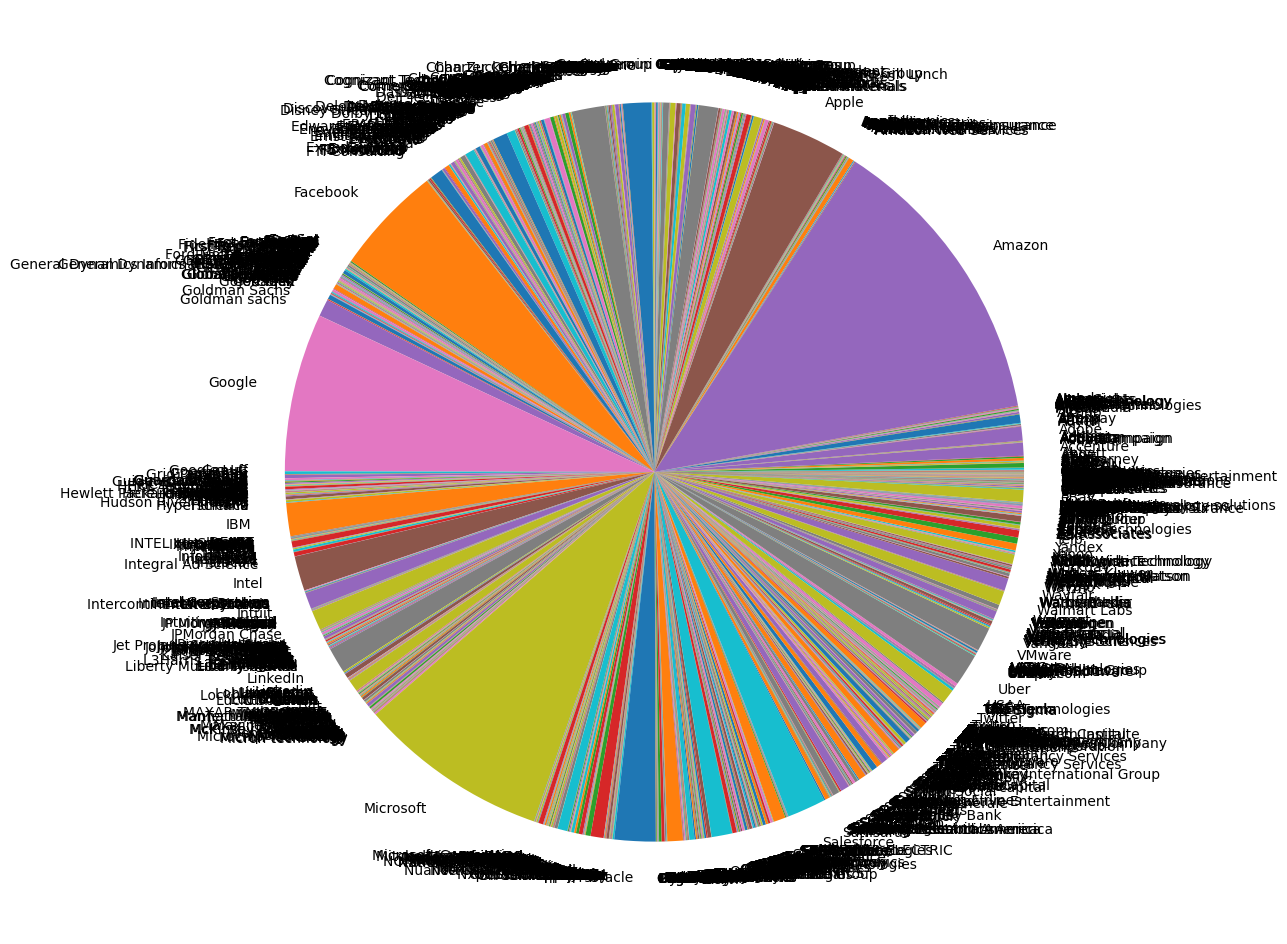

In [18]:
plt.figure(figsize=(12,12))
df.groupby(df["company"]).size().plot(kind="pie")

## Training Models
### Decision Tree Regressor

In [41]:
hot_col = ["company", "location"]
df_encoded = pd.get_dummies(df, columns=hot_col)
df_encoded

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,company_10x Genomics,company_23andMe,company_2U,company_3M,...,"location_Yeovil, EN, United Kingdom","location_Yerevan, ER, Armenia","location_York, PA","location_Yorktown Heights, NY","location_Yulee, FL","location_Zapopan, JA, Mexico","location_Zaragoza, AR, Spain","location_Zug, ZG, Switzerland","location_Zurich, ZH, Switzerland","location_hod hasharon, HM, Israel"
0,127000,1.5,1.5,107000,20000.0,10000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,100000,5.0,3.0,0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,310000,8.0,0.0,155000,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,372000,7.0,5.0,157000,180000.0,35000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,157000,5.0,3.0,0,0.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,327000,10.0,1.0,155000,150000.0,22000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62638,237000,2.0,2.0,146900,73200.0,16000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62639,220000,14.0,12.0,157000,25000.0,20000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62640,280000,8.0,4.0,194688,57000.0,29000.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
x = df_encoded.drop("totalyearlycompensation", axis=1)
y = df_encoded["totalyearlycompensation"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(18792, 2686)
(43845, 2686)
(43845,)
(18792,)


In [62]:
tree1 = DecisionTreeRegressor()
tree1.fit(x_train, y_train)

y_pred = tree1.predict(x_test)
#calculating the tree score
accuracy = r2_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.8640268068483707


In [63]:
x_test, x_val, y_test, y_val = train_test_split(x, y, test_size=.5)
tree1.fit(x_val, y_val)
y_test_pred = tree1.predict(x_val)
accuracy1 = r2_score(y_val, y_test_pred)
print("Accuracy score:", accuracy1)

Accuracy score: 0.9992114308510227


In [65]:
print(f"Testing accuracy: {accuracy:.2f}")
print(f"Validation accuracy: {accuracy1:.2f}")

Testing accuracy: 0.86
Validation accuracy: 1.00


[Text(0.5, 0.9, 'x[3] <= 99500.0\nsquared_error = 19168964220.682\nsamples = 43845\nvalue = 216764.128'),
 Text(0.25, 0.7, 'x[2] <= 140500.0\nsquared_error = 9362810927.045\nsamples = 36475\nvalue = 177223.241'),
 Text(0.125, 0.5, 'x[2] <= 500.0\nsquared_error = 4406867098.2\nsamples = 22260\nvalue = 136772.066'),
 Text(0.0625, 0.3, 'x[0] <= 6.75\nsquared_error = 20638047942.963\nsamples = 1631\nvalue = 231670.754'),
 Text(0.03125, 0.1, 'squared_error = 7715344401.318\nsamples = 823\nvalue = 178331.713'),
 Text(0.09375, 0.1, 'squared_error = 27951116336.634\nsamples = 808\nvalue = 286000.0'),
 Text(0.1875, 0.3, 'x[2] <= 98250.0\nsquared_error = 2355252024.937\nsamples = 20629\nvalue = 129269.048'),
 Text(0.15625, 0.1, 'squared_error = 1090460892.22\nsamples = 7321\nvalue = 80046.114'),
 Text(0.21875, 0.1, 'squared_error = 984907511.804\nsamples = 13308\nvalue = 156347.58'),
 Text(0.375, 0.5, 'x[2] <= 273000.0\nsquared_error = 10548680768.602\nsamples = 14215\nvalue = 240567.816'),
 Tex

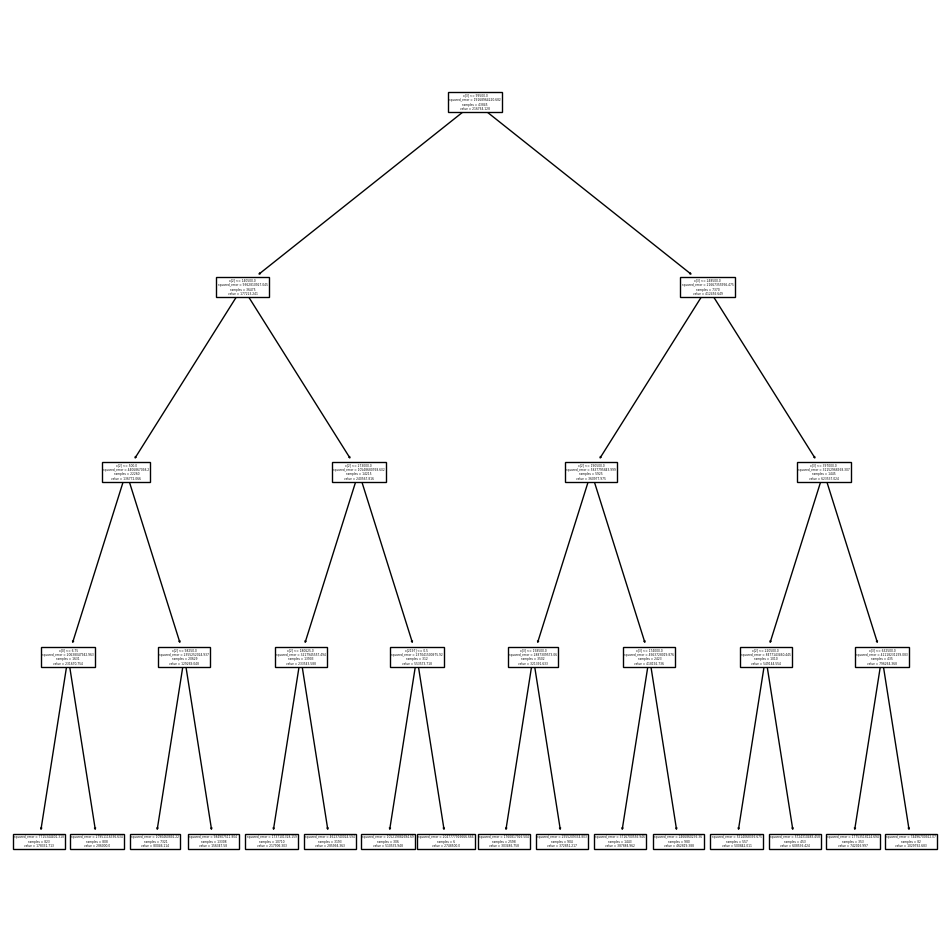

In [61]:
plt.figure(figsize=(12,12))
tree.plot_tree(tree1)


### Linear Regression

### Logistic Regession